In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"D:\ExcelR\Data Science\Assignments\Multi Linear Regression\50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df = df.rename(columns={'R&D Spend' : 'RDS', 'Administration' : 'ADM', 'Marketing Spend' : 'MS'})

In [4]:
df.describe()

,RDS,ADM,MS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


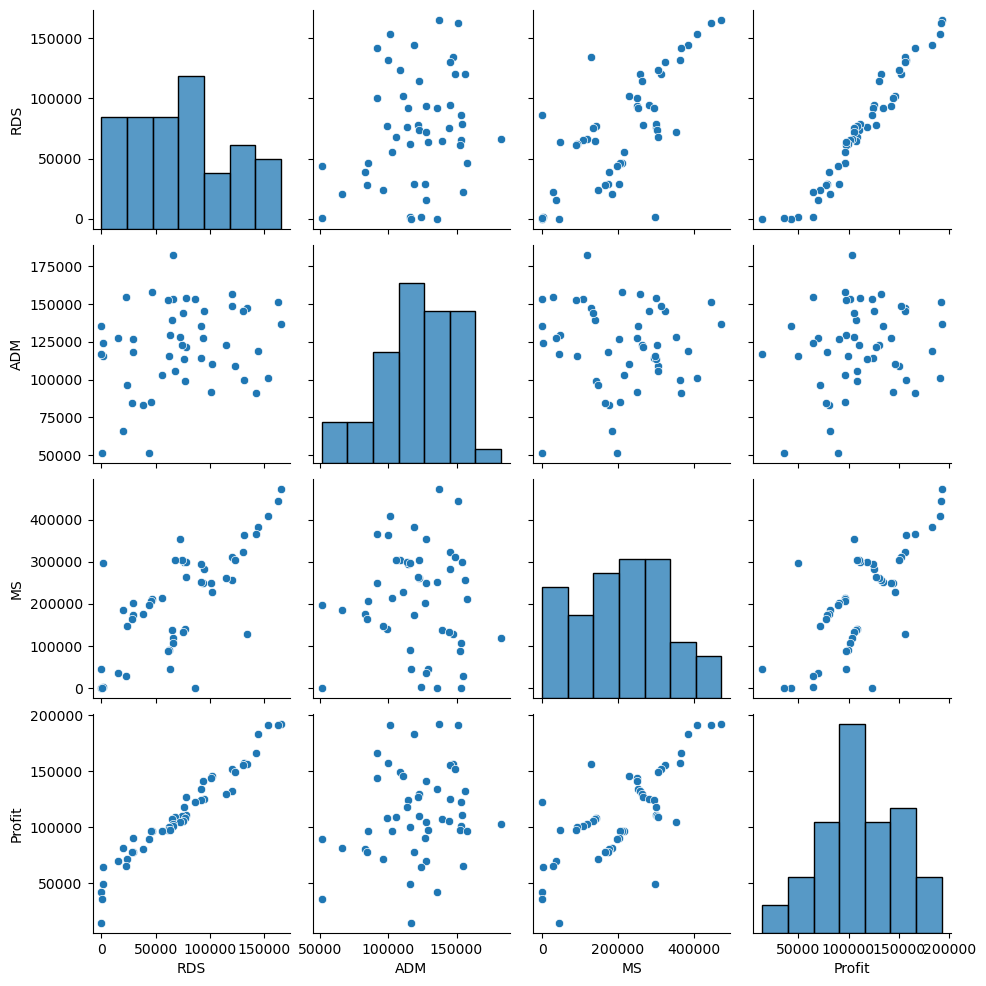

In [5]:
sns.pairplot(df)

Text(0, 0.5, 'R&D Spend')

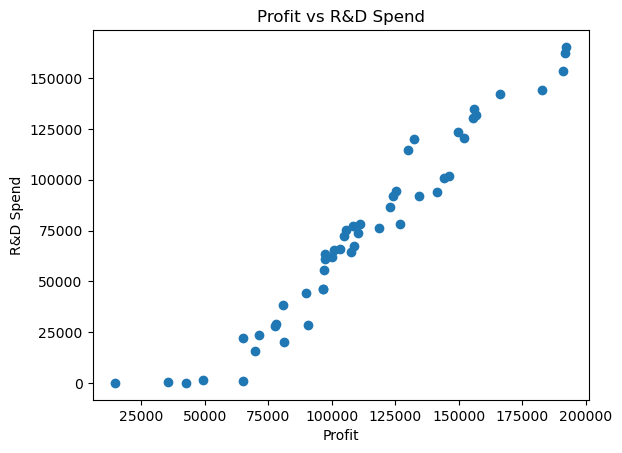

In [6]:
plt.scatter(df['Profit'],df['RDS'])
plt.title('Profit vs R&D Spend')
plt.xlabel('Profit')
plt.ylabel('R&D Spend')

Text(0, 0.5, 'Administration')

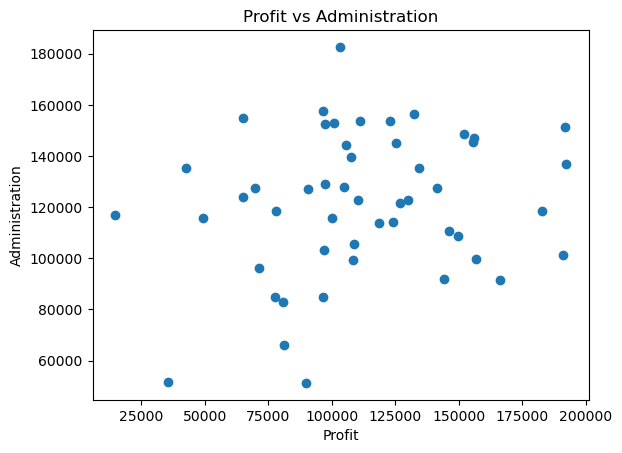

In [7]:
plt.scatter(df['Profit'],df['ADM'])
plt.title('Profit vs Administration')
plt.xlabel('Profit')
plt.ylabel('Administration')

Text(0, 0.5, 'Marketing Spend')

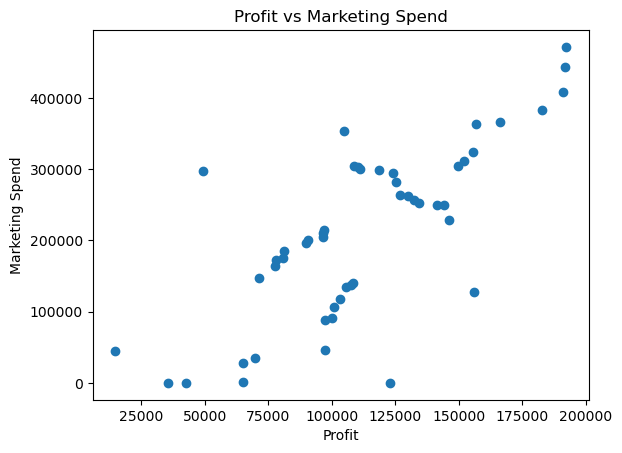

In [8]:
plt.scatter(df['Profit'],df['MS'])
plt.title('Profit vs Marketing Spend')
plt.xlabel('Profit')
plt.ylabel('Marketing Spend')

<AxesSubplot:xlabel='State'>

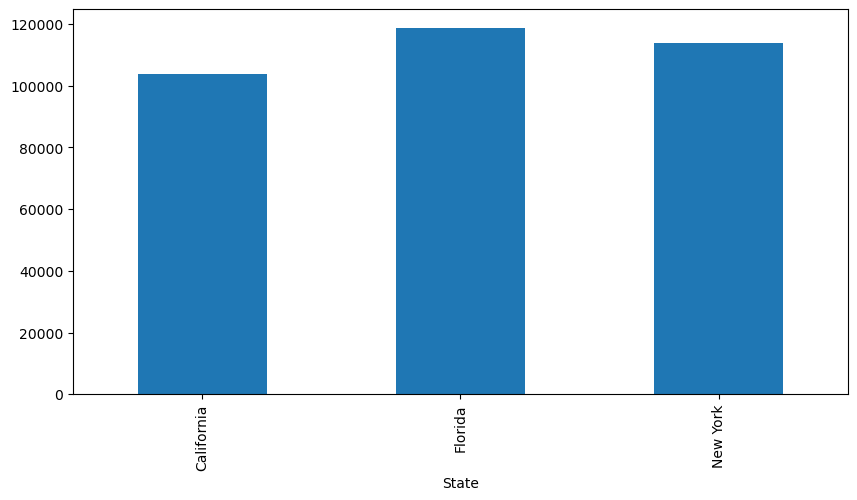

In [9]:
df.groupby(['State'])['Profit'].mean().plot.bar(figsize=(10,5))

In [10]:
df.corr()

,RDS,ADM,MS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADM,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<AxesSubplot:>

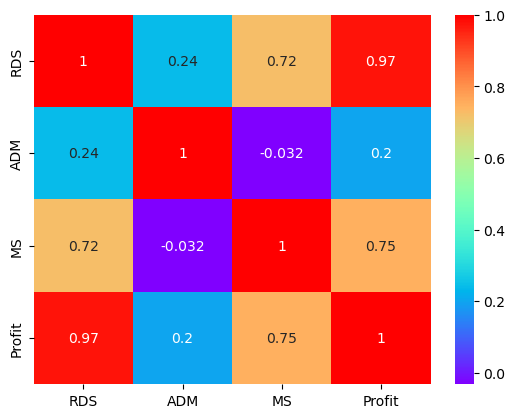

In [11]:
sns.heatmap(df.corr(),annot=True,cmap='rainbow')

In [12]:
#Dummy Variables for 'State' column

In [13]:
df['New York'] = np.where(df['State']=='New York',1,0)

In [14]:
df['California'] = np.where(df['State']=='California',1,0)

In [15]:
df['Florida'] = np.where(df['State']=='Florida',1,0)

In [16]:
df.drop(columns=['State'], axis=1, inplace=True)

In [17]:
df

,RDS,ADM,MS,Profit,New York,California,Florida
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1
5,131876.90,99814.71,362861.36,156991.12,1,0,0
6,134615.46,147198.87,127716.82,156122.51,0,1,0
7,130298.13,145530.06,323876.68,155752.60,0,0,1
8,120542.52,148718.95,311613.29,152211.77,1,0,0
9,123334.88,108679.17,304981.62,149759.96,0,1,0


In [18]:
df.shape

(50, 7)

In [19]:
x = df.iloc[:,[0,1,2,4,5,6]].values
print(x.shape)
x

(50, 6)


array([[1.6534920e+05, 1.3689780e+05, 4.7178410e+05, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.6259770e+05, 1.5137759e+05, 4.4389853e+05, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.5344151e+05, 1.0114555e+05, 4.0793454e+05, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.4437241e+05, 1.1867185e+05, 3.8319962e+05, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.4210734e+05, 9.1391770e+04, 3.6616842e+05, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.3187690e+05, 9.9814710e+04, 3.6286136e+05, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.3461546e+05, 1.4719887e+05, 1.2771682e+05, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.3029813e+05, 1.4553006e+05, 3.2387668e+05, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.2054252e+05, 1.4871895e+05, 3.1161329e+05, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.2333488e+05, 1.0867917e+05,

In [20]:
y = df.iloc[:,[3]].values
print(y.shape)
y

(50, 1)


array([[192261.83],
       [191792.06],
       [191050.39],
       [182901.99],
       [166187.94],
       [156991.12],
       [156122.51],
       [155752.6 ],
       [152211.77],
       [149759.96],
       [146121.95],
       [144259.4 ],
       [141585.52],
       [134307.35],
       [132602.65],
       [129917.04],
       [126992.93],
       [125370.37],
       [124266.9 ],
       [122776.86],
       [118474.03],
       [111313.02],
       [110352.25],
       [108733.99],
       [108552.04],
       [107404.34],
       [105733.54],
       [105008.31],
       [103282.38],
       [101004.64],
       [ 99937.59],
       [ 97483.56],
       [ 97427.84],
       [ 96778.92],
       [ 96712.8 ],
       [ 96479.51],
       [ 90708.19],
       [ 89949.14],
       [ 81229.06],
       [ 81005.76],
       [ 78239.91],
       [ 77798.83],
       [ 71498.49],
       [ 69758.98],
       [ 65200.33],
       [ 64926.08],
       [ 49490.75],
       [ 42559.73],
       [ 35673.41],
       [ 14681.4 ]])

In [21]:
#Transform Data

from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()

In [23]:
x = scaler.fit_transform(x)

In [24]:
y = scaler.fit_transform(y)

In [25]:
#Split the data into Training and Testing

from sklearn.model_selection import train_test_split 

In [26]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, train_size=0.8, random_state=1)

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lg = LinearRegression()
lg.fit(xtrain, ytrain)

LinearRegression()

In [29]:
#Predict

ypred = lg.predict(xtest)
ypred

array([[0.56302948],
       [0.42747816],
       [0.34357075],
       [0.31276243],
       [0.92976943],
       [0.88351808],
       [0.1975003 ],
       [0.4932709 ],
       [0.24759473],
       [0.47071981]])

In [30]:
from sklearn.metrics import r2_score

In [31]:
r2_score(ytest,ypred)

0.9649618042060469